In [ ]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Deep_learning-datasets/NYCTaxiFares.csv')

In [ ]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


In [ ]:
df['fare_class'].value_counts()

,count
fare_class,
0,80000
1,40000


In [ ]:
def haversine_distance(df, lat1, long1, lat2, long2):
    """
    Calculates the haversine distance between 2 sets of GPS coordinates in df
    """
    r = 6371  # average radius of Earth in kilometers

    phi1 = np.radians(df[lat1])
    phi2 = np.radians(df[lat2])

    delta_phi = np.radians(df[lat2]-df[lat1])
    delta_lambda = np.radians(df[long2]-df[long1])

    a = np.sin(delta_phi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = (r * c) # in kilometers

    return d

In [ ]:
df['dist_km'] = haversine_distance(df, 'pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude')

In [ ]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321


In [ ]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['EDTdate'] = df['pickup_datetime'] - pd.Timedelta(hours=4)
df['Hour'] = df['EDTdate'].dt.hour
df['AMorPM'] = np.where(df['Hour']<12,'am','pm')
df['Weekday'] = df['EDTdate'].dt.strftime("%a")
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km,EDTdate,Hour,AMorPM,Weekday
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312,2010-04-19 04:17:56+00:00,4,am,Mon
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307,2010-04-17 11:43:53+00:00,11,am,Sat
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763,2010-04-17 07:23:26+00:00,7,am,Sat
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129,2010-04-11 17:25:03+00:00,17,pm,Sun
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321,2010-04-16 22:19:01+00:00,22,pm,Fri


In [ ]:
df['EDTdate'].min()

Timestamp('2010-04-11 00:00:10+0000', tz='UTC')

In [ ]:
df['EDTdate'].max()

Timestamp('2010-04-24 23:59:42+0000', tz='UTC')

In [ ]:
df.columns

Index(['pickup_datetime', 'fare_amount', 'fare_class', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'dist_km', 'EDTdate', 'Hour', 'AMorPM', 'Weekday'],
      dtype='object')

In [ ]:
cat_cols = ['Hour', 'AMorPM', 'Weekday']
cont_cols = ['pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'dist_km']

In [ ]:
y_col = ['fare_class']

In [ ]:
df.dtypes

,0
pickup_datetime,"datetime64[ns, UTC]"
fare_amount,float64
fare_class,int64
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
passenger_count,int64
dist_km,float64
EDTdate,"datetime64[ns, UTC]"


In [ ]:
for cat in cat_cols:
  df[cat] = df[cat].astype('category')

In [ ]:
df.dtypes

,0
pickup_datetime,"datetime64[ns, UTC]"
fare_amount,float64
fare_class,int64
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
passenger_count,int64
dist_km,float64
EDTdate,"datetime64[ns, UTC]"


In [ ]:
df['Hour'].head()

,Hour
0,4
1,11
2,7
3,17
4,22


In [ ]:
df['AMorPM'].head()

,AMorPM
0,am
1,am
2,am
3,pm
4,pm


In [ ]:
df['Weekday'].head()

,Weekday
0,Mon
1,Sat
2,Sat
3,Sun
4,Fri


In [ ]:
df['AMorPM'].cat.categories

Index(['am', 'pm'], dtype='object')

In [ ]:
df['AMorPM'].cat.codes

,0
0,0
1,0
2,0
3,1
4,1
...,...
119995,0
119996,0
119997,1
119998,0


In [ ]:
df['Weekday'].cat.categories

Index(['Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed'], dtype='object')

In [ ]:
df['Weekday'].cat.codes.values

array([1, 2, 2, ..., 3, 5, 2], dtype=int8)

In [ ]:
hour = df['Hour'].cat.codes.values
ampm = df['AMorPM'].cat.codes.values
weekday = df['Weekday'].cat.codes.values
cats = np.stack([hour,ampm,weekday],axis=1)
cats[:5]

array([[ 4,  0,  1],
       [11,  0,  2],
       [ 7,  0,  2],
       [17,  1,  3],
       [22,  1,  0]], dtype=int8)

In [ ]:
cats = torch.tensor(cats,dtype=torch.int64)
cats[:5]

tensor([[ 4,  0,  1],
        [11,  0,  2],
        [ 7,  0,  2],
        [17,  1,  3],
        [22,  1,  0]])

In [ ]:
conts = np.stack([df[col].values for col in cont_cols],axis=1)
conts = torch.tensor(conts,dtype=torch.float)
conts[:5]

tensor([[-73.9924,  40.7305, -73.9755,  40.7447,   1.0000,   2.1263],
        [-73.9901,  40.7406, -73.9742,  40.7441,   1.0000,   1.3923],
        [-73.9941,  40.7511, -73.9601,  40.7662,   2.0000,   3.3268],
        [-73.9905,  40.7564, -73.9712,  40.7482,   1.0000,   1.8641],
        [-73.9910,  40.7342, -73.9060,  40.7431,   1.0000,   7.2313]])

In [ ]:
conts.type()

'torch.FloatTensor'

In [ ]:
y = torch.tensor(df[y_col].values,dtype=torch.float)

In [ ]:
cats.shape

torch.Size([120000, 3])

In [ ]:
conts.shape

torch.Size([120000, 6])

In [ ]:
y.shape

torch.Size([120000, 1])

In [ ]:
cat_szs = [len(df[col].cat.categories) for col in cat_cols]
emb_szs = [(size,min(50,(size+1)//2)) for size in cat_szs]
emb_szs

[(24, 12), (2, 1), (7, 4)]

In [ ]:
catz = cats[:4]
catz

tensor([[ 4,  0,  1],
        [11,  0,  2],
        [ 7,  0,  2],
        [17,  1,  3]])

In [ ]:
selfembeds = nn.ModuleList([nn.Embedding(ni,nf) for ni,nf in emb_szs])
selfembeds

ModuleList(
  (0): Embedding(24, 12)
  (1): Embedding(2, 1)
  (2): Embedding(7, 4)
)

In [ ]:
# FORARD METHOD (cats)

embeddingz = []
for i,e in enumerate(selfembeds):
  embeddingz.append(e(catz[:,i]))
embeddingz

[tensor([[ 0.0589, -2.2637, -0.3288,  1.0010, -0.2765, -1.0737,  0.5315, -0.0631,
          -0.4874, -0.9419,  1.3863, -0.0316],
         [-0.4087, -0.5448, -0.1282,  0.7460,  0.5263,  0.5239,  1.4243, -1.0724,
           0.5964, -0.8490, -0.0223, -1.5095],
         [-0.4241,  0.2218,  2.2738, -1.3754,  0.0968, -0.6410, -0.7588, -1.3680,
           1.2514,  1.5478,  1.4513, -0.0571],
         [ 0.3305, -1.0809, -0.5122,  1.1372,  0.7013, -0.1718,  0.6066, -0.9302,
          -1.0500,  0.6280, -0.4191,  0.0172]], grad_fn=<EmbeddingBackward0>),
 tensor([[ 0.4649],
         [ 0.4649],
         [ 0.4649],
         [-0.3215]], grad_fn=<EmbeddingBackward0>),
 tensor([[ 1.0408,  0.6254, -1.4092,  1.2361],
         [-0.2942,  1.6538, -0.4572, -1.0920],
         [-0.2942,  1.6538, -0.4572, -1.0920],
         [ 0.8511,  1.5038,  0.7481, -0.7746]], grad_fn=<EmbeddingBackward0>)]

In [ ]:
z = torch.cat(embeddingz,1)
z

tensor([[ 0.0589, -2.2637, -0.3288,  1.0010, -0.2765, -1.0737,  0.5315, -0.0631,
         -0.4874, -0.9419,  1.3863, -0.0316,  0.4649,  1.0408,  0.6254, -1.4092,
          1.2361],
        [-0.4087, -0.5448, -0.1282,  0.7460,  0.5263,  0.5239,  1.4243, -1.0724,
          0.5964, -0.8490, -0.0223, -1.5095,  0.4649, -0.2942,  1.6538, -0.4572,
         -1.0920],
        [-0.4241,  0.2218,  2.2738, -1.3754,  0.0968, -0.6410, -0.7588, -1.3680,
          1.2514,  1.5478,  1.4513, -0.0571,  0.4649, -0.2942,  1.6538, -0.4572,
         -1.0920],
        [ 0.3305, -1.0809, -0.5122,  1.1372,  0.7013, -0.1718,  0.6066, -0.9302,
         -1.0500,  0.6280, -0.4191,  0.0172, -0.3215,  0.8511,  1.5038,  0.7481,
         -0.7746]], grad_fn=<CatBackward0>)

In [ ]:
selfembdrop = nn.Dropout(0.4)
z = selfembdrop(z)
z

tensor([[ 0.0982, -0.0000, -0.5481,  1.6684, -0.0000, -1.7896,  0.0000, -0.0000,
         -0.8123, -0.0000,  0.0000, -0.0000,  0.7749,  1.7347,  1.0423, -0.0000,
          2.0602],
        [-0.0000, -0.9081, -0.2137,  1.2434,  0.8771,  0.0000,  0.0000, -1.7874,
          0.9939, -1.4150, -0.0000, -2.5158,  0.7749, -0.0000,  2.7563, -0.7620,
         -1.8200],
        [-0.0000,  0.3697,  3.7897, -2.2924,  0.0000, -1.0683, -1.2647, -0.0000,
          2.0856,  2.5796,  2.4189, -0.0952,  0.7749, -0.4904,  2.7563, -0.7620,
         -1.8200],
        [ 0.0000, -1.8015, -0.0000,  1.8954,  1.1688, -0.2863,  1.0110, -1.5503,
         -0.0000,  0.0000, -0.0000,  0.0287, -0.0000,  0.0000,  2.5064,  1.2468,
         -0.0000]], grad_fn=<MulBackward0>)

In [ ]:
class TabularModel(nn.Module):

    def __init__(self, emb_szs, n_cont, out_sz, layers, p=0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(ni, nf) for ni,nf in emb_szs])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)

        layerlist = []
        n_emb = sum((nf for ni,nf in emb_szs))
        n_in = n_emb + n_cont

        for i in layers:
            layerlist.append(nn.Linear(n_in,i))
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))

        self.layers = nn.Sequential(*layerlist)

    def forward(self, x_cat, x_cont):
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)

        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        x = self.layers(x)
        return x

In [ ]:
torch.manual_seed(33)
model = TabularModel(emb_szs,conts.shape[1],2,[200,100],p=0.4)

In [ ]:
model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(24, 12)
    (1): Embedding(2, 1)
    (2): Embedding(7, 4)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=23, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=2, bias=True)
  )
)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [ ]:
batch_size = 60000
test_size = int(batch_size*0.2)

cat_train = cats[:batch_size-test_size]
cat_test = cats[batch_size-test_size:batch_size]
cont_train = conts[:batch_size-test_size]
cont_test = conts[batch_size-test_size:batch_size]
y_train = y[:batch_size-test_size]
y_test = y[batch_size-test_size:batch_size]

In [ ]:
y_train = y_train.squeeze().long()
y_test = y_test.squeeze().long()

In [ ]:
len(cat_train)

48000

In [ ]:
len(cat_test)

12000

In [ ]:
import time
start_time = time.time()

epochs = 350
losses = []

for i in range(epochs):
    i += 1

    # Get the raw logits from the model (without applying argmax or softmax)
    y_pred = model(cat_train, cont_train)

    # Ensure y_train contains class indices with shape [batch_size]
    # For CrossEntropyLoss, pass raw logits and class indices as targets
    loss = criterion(y_pred, y_train)  # criterion is nn.CrossEntropyLoss()

    losses.append(loss.item())

    if i % 25 == 1:
        print(f'Epoch: {i:3}  Loss: {loss.item():10.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Print the final epoch and training duration
print(f'Epoch: {i:3}  Loss: {loss.item():10.8f}')
print(f'\nDuration: {time.time() - start_time:.0f} seconds')


Epoch:   1  Loss: 0.82423776
Epoch:  26  Loss: 0.37460527
Epoch:  51  Loss: 0.33691967
Epoch:  76  Loss: 0.31241354
Epoch: 101  Loss: 0.30193293
Epoch: 126  Loss: 0.29230502
Epoch: 151  Loss: 0.28433114
Epoch: 176  Loss: 0.28204399
Epoch: 201  Loss: 0.27446923
Epoch: 226  Loss: 0.26984251
Epoch: 251  Loss: 0.26440299
Epoch: 276  Loss: 0.26299578
Epoch: 301  Loss: 0.25817889
Epoch: 326  Loss: 0.25537056
Epoch: 350  Loss: 0.25231436

Duration: 166 seconds


Text(0.5, 0, 'Epoch')

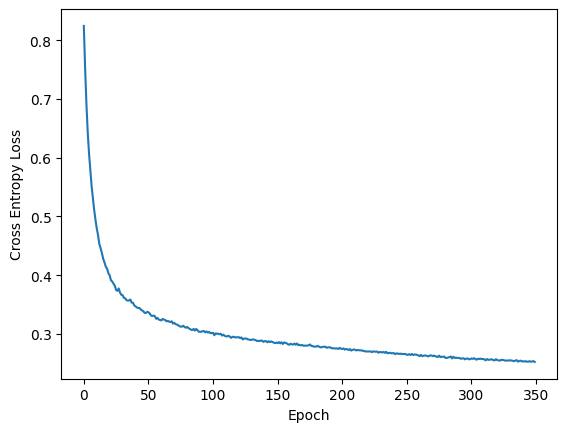

In [ ]:
plt.plot(range(epochs),losses)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Epoch')

In [ ]:
with torch.no_grad():
  y_val = model(cat_test, cont_test)
  loss = torch.sqrt(criterion(y_val,y_test))
print(f'CE Loss: {loss:.8f}')

CE Loss: 0.49820739


In [ ]:
rows = 50
correct = 0
print(f'{"MODEL OUTPUT":26} ARGMAX  Y_TEST')
for i in range(rows):
    print(f'{str(y_val[i]):26} {y_val[i].argmax():^7}{y_test[i]:^7}')
    if y_val[i].argmax().item() == y_test[i]:
        correct += 1
print(f'\n{correct} out of {rows} = {100*correct/rows:.2f}% correct')

MODEL OUTPUT               ARGMAX  Y_TEST
tensor([ 3.1931, -1.7916])    0      0   
tensor([-2.6330,  2.7335])    1      0   
tensor([ 2.1311, -1.6997])    0      0   
tensor([-1.2730,  0.6830])    1      1   
tensor([ 2.4262, -1.4499])    0      0   
tensor([ 1.2053, -1.3907])    0      0   
tensor([ 1.8786, -1.2016])    0      0   
tensor([-2.9791,  0.8716])    1      1   
tensor([ 3.1000, -1.1200])    0      0   
tensor([-0.2992,  1.0178])    1      1   
tensor([ 1.2271, -1.8812])    0      0   
tensor([ 1.4884, -1.8243])    0      0   
tensor([ 2.0073, -1.1105])    0      0   
tensor([-1.7232,  1.0392])    1      1   
tensor([ 1.5683, -1.6567])    0      0   
tensor([-4.3622,  1.0473])    1      1   
tensor([ 1.9929, -2.1886])    0      1   
tensor([ 2.1952, -1.3473])    0      0   
tensor([ 1.4835, -0.1347])    0      0   
tensor([ 1.6769, -1.6526])    0      0   
tensor([-1.5896,  1.1528])    1      1   
tensor([-1.2790,  0.5089])    1      1   
tensor([-2.1680,  2.1321])    1   

In [ ]:
if len(losses) == epochs:
    torch.save(model.state_dict(), '/content/drive/MyDrive/Deep_learning-datasets/TaxiFareClssModel.pt')
else:
    print('Model has not been trained. Consider loading a trained model instead.')

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
pd.set_option('future.no_silent_downcasting', True)

def haversine_distance(df, lat1, long1, lat2, long2):
    r = 6371
    phi1 = np.radians(df[lat1])
    phi2 = np.radians(df[lat2])
    delta_phi = np.radians(df[lat2]-df[lat1])
    delta_lambda = np.radians(df[long2]-df[long1])
    a = np.sin(delta_phi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return r * c

class TabularModel(nn.Module):
    def __init__(self, emb_szs, n_cont, out_sz, layers, p=0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(ni, nf) for ni,nf in emb_szs])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        layerlist = []
        n_emb = sum((nf for ni,nf in emb_szs))
        n_in = n_emb + n_cont
        for i in layers:
            layerlist.append(nn.Linear(n_in,i))
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))
        self.layers = nn.Sequential(*layerlist)
    def forward(self, x_cat, x_cont):
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        return self.layers(x)

In [ ]:
emb_szs = [(24, 12), (2, 1), (7, 4)]
model2 = TabularModel(emb_szs, 6, 2, [200,100], p=0.4)

In [ ]:
model2.load_state_dict(torch.load('/content/drive/MyDrive/Deep_learning-datasets/TaxiFareClssModel.pt'));
model2.eval()

<ipython-input-156-7b550ae7b950>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model2.load_state_dict(torch.load('/content/drive/MyDrive/Deep_learning-datasets/TaxiFareCl

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(24, 12)
    (1): Embedding(2, 1)
    (2): Embedding(7, 4)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=23, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=2, bias=True)
  )
)

In [ ]:
def test_data(mdl): # pass in the name of the new model
    # INPUT NEW DATA
    plat = float(input('What is the pickup latitude?  '))
    plong = float(input('What is the pickup longitude? '))
    dlat = float(input('What is the dropoff latitude?  '))
    dlong = float(input('What is the dropoff longitude? '))
    psngr = int(input('How many passengers? '))
    dt = input('What is the pickup date and time?\nFormat as YYYY-MM-DD HH:MM:SS     ')

    # PREPROCESS THE DATA
    dfx_dict = {'pickup_latitude':plat,'pickup_longitude':plong,'dropoff_latitude':dlat,
         'dropoff_longitude':dlong,'passenger_count':psngr,'EDTdate':dt}
    dfx = pd.DataFrame(dfx_dict, index=[0])
    dfx['dist_km'] = haversine_distance(dfx,'pickup_latitude', 'pickup_longitude',
                                        'dropoff_latitude', 'dropoff_longitude')
    dfx['EDTdate'] = pd.to_datetime(dfx['EDTdate'])

    # We can skip the .astype(category) step since our fields are small,
    # and encode them right away
    dfx['Hour'] = dfx['EDTdate'].dt.hour
    dfx['AMorPM'] = np.where(dfx['Hour']<12,0,1)
    dfx['Weekday'] = dfx['EDTdate'].dt.strftime("%a")
    dfx['Weekday'] = dfx['Weekday'].replace(['Fri','Mon','Sat','Sun','Thu','Tue','Wed'],
                                            [0,1,2,3,4,5,6]).astype('int64')
    # CREATE CAT AND CONT TENSORS
    cat_cols = ['Hour', 'AMorPM', 'Weekday']
    cont_cols = ['pickup_latitude', 'pickup_longitude', 'dropoff_latitude',
                 'dropoff_longitude', 'passenger_count', 'dist_km']
    xcats = np.stack([dfx[col].values for col in cat_cols], 1)
    xcats = torch.tensor(xcats, dtype=torch.int64)
    xconts = np.stack([dfx[col].values for col in cont_cols], 1)
    xconts = torch.tensor(xconts, dtype=torch.float)

    # PASS NEW DATA THROUGH THE MODEL WITHOUT PERFORMING A BACKPROP
    with torch.no_grad():
        z = mdl(xcats, xconts).argmax().item()
    print(f'\nThe predicted fare class is {z}')

In [ ]:
test_data(model2)

What is the pickup latitude?  40.5
What is the pickup longitude? -73.9
What is the dropoff latitude?  40.52
What is the dropoff longitude? -73.92
How many passengers? 2
What is the pickup date and time?
Format as YYYY-MM-DD HH:MM:SS     2010-04-15 16:00:00

The predicted fare class is 1
